In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nptdms import TdmsFile

In [6]:
file_path = '../data/250516_04.tdms'

tdms = TdmsFile.read(file_path)

print("✅ Available groups and channels:")
group_channel_map = {}
for grp in tdms.groups():
    name = grp.name
    channels = [ch.name for ch in grp.channels()]
    group_channel_map[name] = channels
    print(f" - Group: {name}")
    for ch in channels:
        print(f"    • {ch}")

✅ Available groups and channels:
 - Group: Datas
    • Time (ms)
    • Reference Position X
    • Reference Position Y
    • Measured Position X
    • Measured Position Y
    • Reference Tension L
    • Reference Tension R
    • Reference Tension T
    • Measured Tension L
    • Measured Tension R
    • Measured Tension T
    • RBF1
    • RBF2
    • RBF3
    • Trajectory
    • Performance
    • Force X
    • Force y
    • Damp1
    • Damp2
    • Damp3


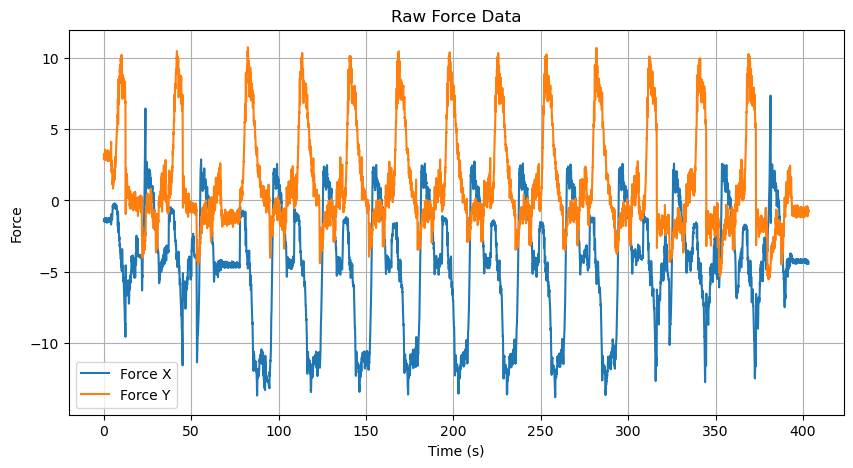

In [7]:
# 채널값 추출 (스케일 적용)
fx = tdms[group]['Force X'][:]
fy = tdms[group]['Force y'][:]
time = np.arange(len(fx)) / 50  # sample_rate=50

plt.figure(figsize=(10,5))
plt.plot(time, fx, color='C0', label='Force X')      # 파란색
plt.plot(time, fy, color='C1', label='Force Y')      # 주황색
plt.title('Raw Force Data')
plt.xlabel('Time (s)'); plt.ylabel('Force')
plt.legend(); plt.grid(True)
plt.show()


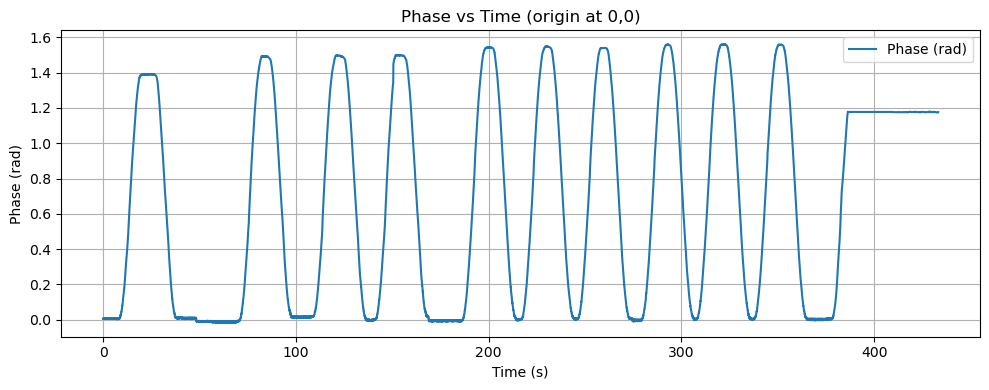

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# --- 기존 pos_x, pos_y, time 준비된 상태라 가정 -------------------------------
# pos_x, pos_y: [m], time: [s]

# 1) Phase 계산 (rad)
phase = np.arctan2(pos_y, pos_x)

# 2) 위상이 연속되도록 unwrapping (옵션)
phase_unwrapped = np.unwrap(phase)

# 3) (선택) Degree 로 보고 싶다면
phase_deg = np.degrees(phase_unwrapped)

# 4) 플롯: 시간 vs 위상
plt.figure(figsize=(10,4))
plt.plot(time, phase_unwrapped, label='Phase (rad)')
# plt.plot(time, phase_deg, label='Phase (°)')  # degree 버전

plt.xlabel('Time (s)')
plt.ylabel('Phase (rad)')
plt.title('Phase vs Time (origin at 0,0)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
